In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout, Flatten,MaxPooling2D
import os
import numpy as np
import pandas as pd

In [2]:
Train_dir='Emotion/train'
Test_dir='Emotion/test'

In [3]:
def createDataFrame(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [4]:
train=pd.DataFrame()
train['image'],train['label']=createDataFrame(Train_dir)


angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [5]:
train

,image,label
0,Emotion/train\angry\im0.png,angry
1,Emotion/train\angry\im1.png,angry
2,Emotion/train\angry\im10.png,angry
3,Emotion/train\angry\im100.png,angry
4,Emotion/train\angry\im1000.png,angry
...,...,...
28704,Emotion/train\surprised\im995.png,surprised
28705,Emotion/train\surprised\im996.png,surprised
28706,Emotion/train\surprised\im997.png,surprised
28707,Emotion/train\surprised\im998.png,surprised


In [6]:
test=pd.DataFrame()
test['image'],test['label']=createDataFrame(Test_dir)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [7]:
test

,image,label
0,Emotion/test\angry\im0.png,angry
1,Emotion/test\angry\im1.png,angry
2,Emotion/test\angry\im10.png,angry
3,Emotion/test\angry\im100.png,angry
4,Emotion/test\angry\im101.png,angry
...,...,...
7173,Emotion/test\surprised\im95.png,surprised
7174,Emotion/test\surprised\im96.png,surprised
7175,Emotion/test\surprised\im97.png,surprised
7176,Emotion/test\surprised\im98.png,surprised


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
X_train=train_features/255.0
X_test=test_features/255.0

In [13]:
X_train

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [17]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [18]:
model=Sequential()

In [19]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001EFE5B4E210>>

In [20]:
model=Sequential()
# conolutional layers
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics='accuracy')

In [22]:
model.fit(x=X_train,y=y_train,batch_size=128,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
225/225 [==============================] - 448s 2s/step - loss: 1.8240 - accuracy: 0.2473 - val_loss: 1.8170 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 452s 2s/step - loss: 1.8060 - accuracy: 0.2527 - val_loss: 1.7938 - val_accuracy: 0.2501
Epoch 3/100
225/225 [==============================] - 404s 2s/step - loss: 1.7509 - accuracy: 0.2768 - val_loss: 1.6912 - val_accuracy: 0.2953
Epoch 4/100
225/225 [==============================] - 324s 1s/step - loss: 1.6628 - accuracy: 0.3334 - val_loss: 1.5711 - val_accuracy: 0.3671
Epoch 5/100
225/225 [==============================] - 317s 1s/step - loss: 1.5466 - accuracy: 0.3948 - val_loss: 1.4329 - val_accuracy: 0.4461
Epoch 6/100
225/225 [==============================] - 319s 1s/step - loss: 1.4631 - accuracy: 0.4364 - val_loss: 1.3442 - val_accuracy: 0.4848
Epoch 7/100
225/225 [==============================] - 308s 1s/step - loss: 1.4128 - accuracy: 0.4535 - val_loss: 1.3099 - val_accuracy:

In [23]:
model_json=model.to_json()
with open("emotiondectector.json","w") as f:
    f.write(model_json)
model.save("emotiondectector.h5")

C:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# from keras.models import model_from_json
# json_file=open("emotiondectector.h5","rb")
# model_json=json_file.read()
# json_file.close()
# model=model_from_json(model_json)
# model.load_weights("emotiondectector.h5")

In [27]:
label=['angry','disgusted','fearful','happy','neutral','sad','surprised']

In [30]:
def ef(image):
    img=load_img(image,grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

orginal image is of disgusted
1/1 [==============================] - 0s 45ms/step
model predicition is  disgusted


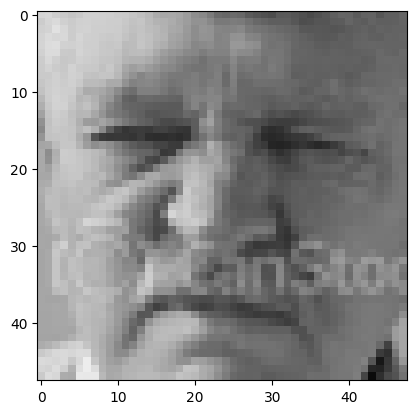

In [44]:
image='Emotion/train/disgusted/im100.png'
img1=cv2.imread(image)
print("orginal image is of disgusted")
img= ef(image)
pred =model.predict(img)
pred_label = label[pred.argmax()]
print("model predicition is ",pred_label)
# plt.imshow(img.reshape(48,48))
plt.imshow(img1)

orginal image is of happy
1/1 [==============================] - 0s 40ms/step
model predicition is  happy


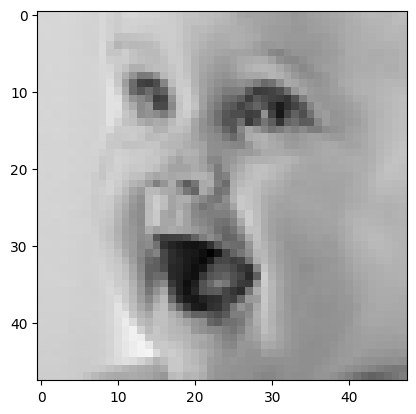

In [47]:
image='Emotion/train/happy/im100.png'
img1=cv2.imread(image)
print("orginal image is of happy")
img= ef(image)
pred =model.predict(img)
pred_label = label[pred.argmax()]
print("model predicition is ",pred_label)
# plt.imshow(img.reshape(48,48))
plt.imshow(img1)

orginal image is of angry
1/1 [==============================] - 0s 59ms/step
model predicition is  angry


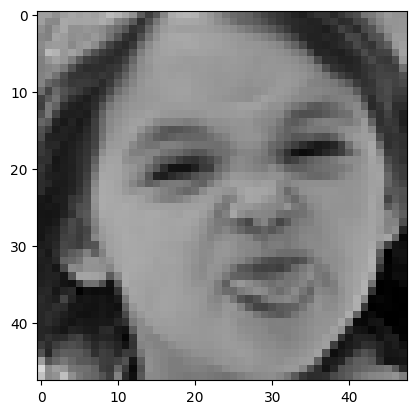

In [48]:
image='Emotion/train/angry/im100.png'
img1=cv2.imread(image)
print("orginal image is of angry")
img= ef(image)
pred =model.predict(img)
pred_label = label[pred.argmax()]
print("model predicition is ",pred_label)
# plt.imshow(img.reshape(48,48))
plt.imshow(img1)

orginal image is of surprised
1/1 [==============================] - 0s 37ms/step
model predicition is  surprised


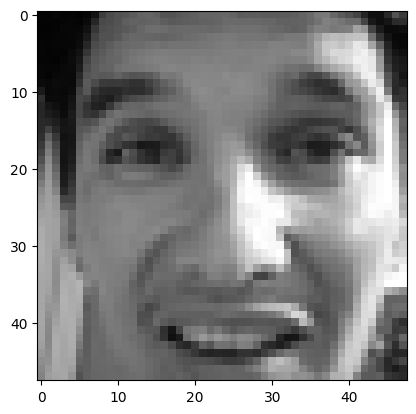

In [49]:
image='Emotion/train/surprised/im100.png'
img1=cv2.imread(image)
print("orginal image is of surprised")
img= ef(image)
pred =model.predict(img)
pred_label = label[pred.argmax()]
print("model predicition is ",pred_label)
# plt.imshow(img.reshape(48,48))
plt.imshow(img1)